In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Loading the dataset 
df = pd.read_csv("amz_pred_dataset.csv")

In [3]:
# Display the first few rows of the dataset
df.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [4]:
# Retrieving the number of rows and columns in the dataframe
df.shape

(2443651, 9)

In [5]:
# Displaying the data types of each column in the dataframe
df.dtypes

uid                    int64
asin                  object
title                 object
stars                float64
reviews                int64
price                float64
isBestSeller            bool
boughtInLastMonth      int64
category              object
dtype: object

### Part 1: Understanding Product Categories

**Business Question**: What are the most popular product categories on Amazon UK, and how do they compare in terms of listing frequency?

1. **Frequency Tables**:
    - Generate a frequency table for the product `category`.
    - Which are the top 5 most listed product categories?

In [6]:
df_frequency = df['category'].value_counts(ascending=False).head(5)

In [7]:
print(df_frequency)

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
Name: count, dtype: int64


In [10]:
frequency_table = df_frequency.reset_index()
frequency_table.columns = ['Category', 'Frequency']

frequency_table

,Category,Frequency
0,Sports & Outdoors,836265
1,Beauty,19312
2,"Handmade Clothing, Shoes & Accessories",19229
3,Bath & Body,19092
4,Birthday Gifts,18978


2. **Visualizations**:
    - Display the distribution of products across different categories using a bar chart. *If you face problems understanding the chart, do it for a subset of top categories.*
    - For a subset of top categories, visualize their proportions using a pie chart. Does any category dominate the listings?

/tmp/ipykernel_32734/3197049306.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=frequency_table, x='Category', y='Frequency', palette='viridis')


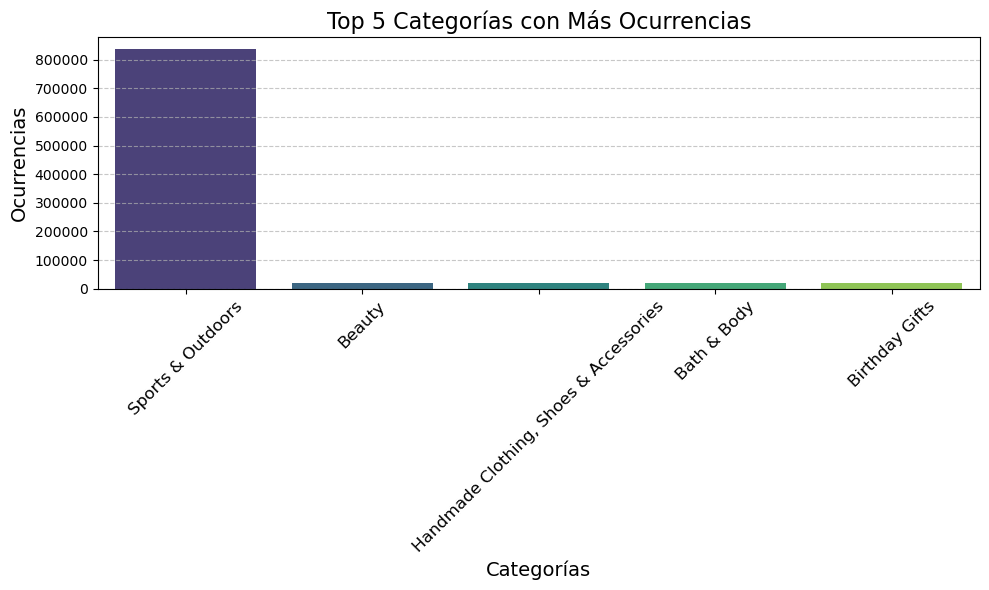

In [14]:

plt.figure(figsize=(10, 6))
sns.barplot(data=frequency_table, x='Category', y='Frequency', palette='viridis')

plt.title('Top 5 Categorías con Más Ocurrencias', fontsize=16)
plt.xlabel('Categorías', fontsize=14)
plt.ylabel('Ocurrencias', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

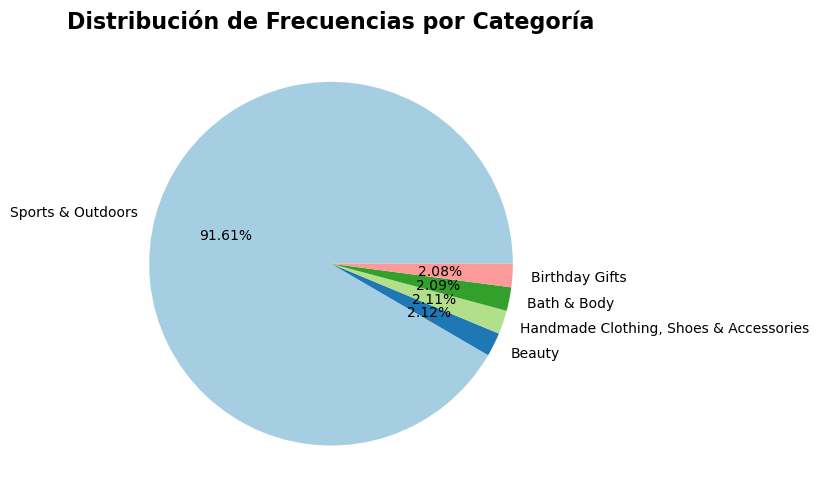

In [ ]:
# Pie Chart
plt.figure(figsize=(8, 8))  
plt.pie(
    frequency_table['Frequency'],  # Values
    labels=frequency_table['Category'],  # Labels with the categories
    autopct='%1.2f%%',  # Percentage with 2 decimals
    startangle=0,  
    colors=plt.cm.Paired.colors  # Color Palette
)

# Adding Title
plt.title('Distribución de Frecuencias por Categoría', fontsize=16, weight='bold')


plt.tight_layout()
plt.show()

### Part 2: Delving into Product Pricing

**Business Question**: How are products priced on Amazon UK, and are there specific price points or ranges that are more common?

1. **Measures of Centrality**:
    - Calculate the mean, median, and mode for the `price` of products.
    - What's the average price point of products listed? How does this compare with the most common price point (mode)?



In [39]:
# Calculate mean, median and mode
mean_price = df['price'].mean()
median_price = df['price'].median()
mode_price = df['price'].mode()[0]  # [0] para obtener el valor más frecuente (en caso de varias modas)


print(f"Mean: {mean_price}")
print(f"Median: {median_price}")
print(f"Mode: {mode_price}")

Mean: 89.24380943923663
Median: 19.09
Mode: 9.99


 - What's the average price point of products listed? How does this compare with the most common price point (mode)?

In [40]:

print(f"Average Price: {mean_price:.2f}")
print(f"Most Common Price: {mode_price:.2f}")


comparison = "higher" if mean_price > mode_price else "lower" if mean_price < mode_price else "equal"
print(f"The average price is {comparison} than the most common price.")


Average Price: 89.24
Most Common Price: 9.99
The average price is higher than the most common price.


In [42]:
difference = abs(mean_price - mode_price)
print(f"The absolute difference between the average price and the most common price is {difference:.2f}.")


The absolute difference between the average price and the most common price is 79.25.


In [43]:
percentage_difference = ((mean_price - mode_price) / mode_price) * 100
print(f"The average price is {percentage_difference:.2f}% {'higher' if percentage_difference > 0 else 'lower'} than the most common price.")


The average price is 793.33% higher than the most common price.


2. **Measures of Dispersion**:
    - Determine the variance, standard deviation, range, and interquartile range for product `price`.
    - How varied are the product prices? Are there any indicators of a significant spread in prices?



In [44]:

variance_price = df['price'].var()
std_dev_price = df['price'].std()
min_price = df['price'].min()
max_price = df['price'].max()
range_price = max_price - min_price


print(f"Variance: {variance_price}")
print(f"Standard Deviation: {std_dev_price}")
print(f"Range: {range_price}")


Variance: 119445.48532256528
Standard Deviation: 345.60886175352226
Range: 100000.0


In [45]:
# Calcular Q1 y Q3
Q1 = np.percentile(df['price'], 25)  # Primer cuartil (25%)
Q3 = np.percentile(df['price'], 75)  # Tercer cuartil (75%)

# Calcular IQR
IQR = Q3 - Q1

# Mostrar resultados
print(f"Q1 (Primer Cuartil): {Q1}")
print(f"Q3 (Tercer Cuartil): {Q3}")
print(f"IQR (Rango Intercuartílico): {IQR}")


Q1 (Primer Cuartil): 9.99
Q3 (Tercer Cuartil): 45.99
IQR (Rango Intercuartílico): 36.0


cómo puedo saber si el rango es amplio o no?

Una forma simple de evaluar si el rango es amplio es compararlo con el valor medio. Si el rango es mucho mayor que el promedio, es un indicador de que hay una gran dispersión en los datos.



In [56]:
mean_price = df['price'].mean()
range_price = max_price - min_price
print(f"Rango en relación al promedio: {range_price / mean_price:.2f} veces el promedio.")

Rango en relación al promedio: 1120.53 veces el promedio.


Sí, es muy amplio.

In [46]:
print(f"Rango en relación al IQR: {range_price / IQR:.2f} veces el IQR.")

Rango en relación al IQR: 2777.78 veces el IQR.


In [47]:
cv = std_dev_price / mean_price
print(f"Coeficiente de Variación (CV): {cv:.2%}")

Coeficiente de Variación (CV): 387.26%


Si el CV es mayor al 30%, puede interpretarse como una alta dispersión en los precios.

Un rango es "amplio" si:

    1.-Es varias veces mayor que el promedio.
    2.-Es mucho mayor que el IQR.
    3.-Hay valores extremos detectados (outliers).
    4.-El coeficiente de variación (CV) es alto (>30%).

3. **Visualizations**:
    - Is there a specific price range where most products fall? Plot a histogram to visualize the distribution of product prices. *If its hard to read these diagrams, think why this is, and explain how it could be solved.*.
    - Are there products that are priced significantly higher than the rest? Use a box plot to showcase the spread and potential outliers in product pricing. 

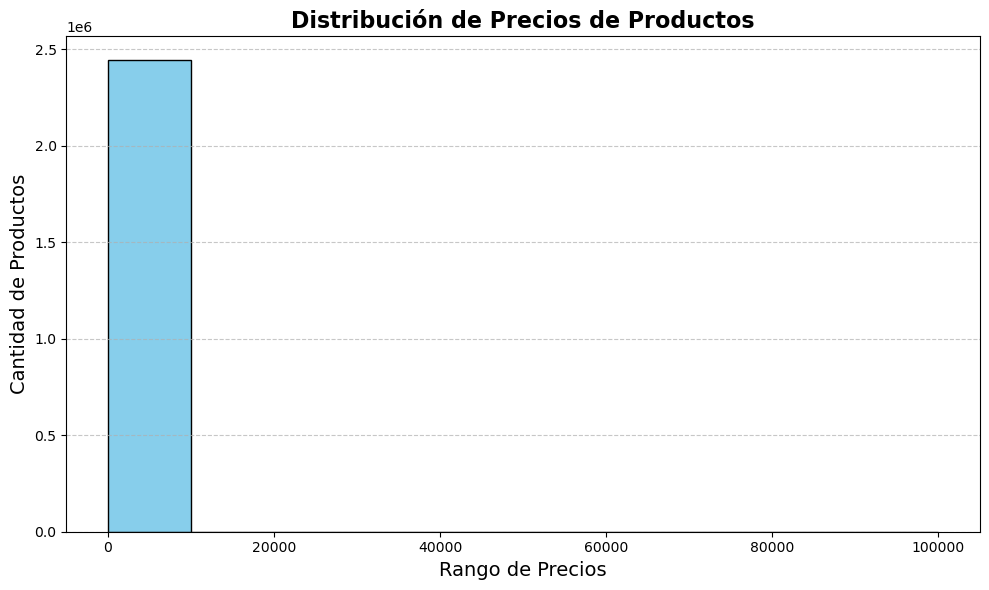

In [48]:

plt.figure(figsize=(10, 6))
plt.hist(df['price'], bins=10, color='skyblue', edgecolor='black')  # Ajustar el número de bins según la distribución
plt.title('Distribución de Precios de Productos', fontsize=16, weight='bold')
plt.xlabel('Rango de Precios', fontsize=14)
plt.ylabel('Cantidad de Productos', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

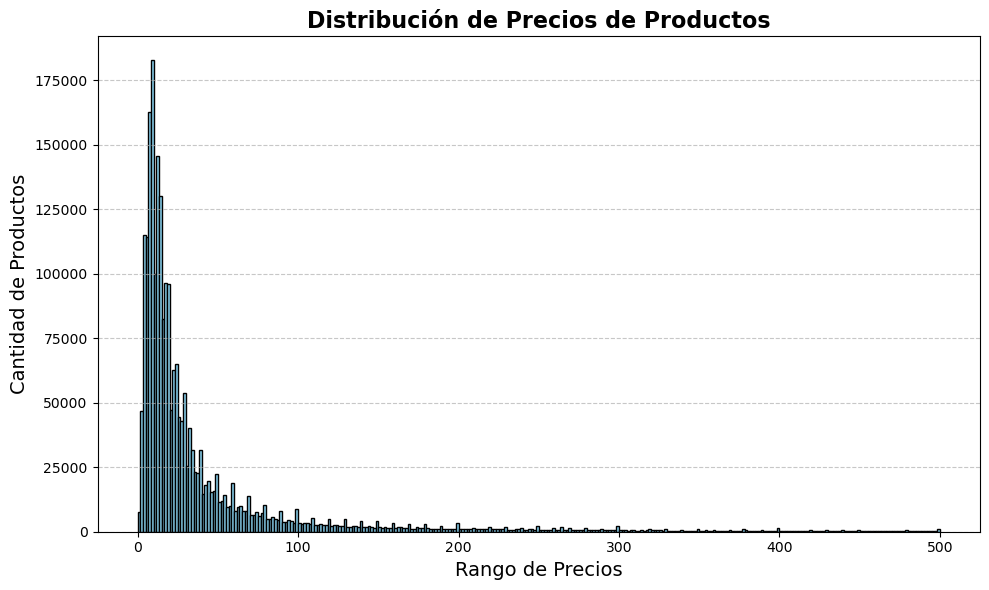

In [49]:
# Crear el histograma con rango hasta 500 euros
plt.figure(figsize=(10, 6))
plt.hist(df['price'], bins=300, range=(0, 500), color='skyblue', edgecolor='black')  # Ajustar rango y número de bins
plt.title('Distribución de Precios de Productos', fontsize=16, weight='bold')
plt.xlabel('Rango de Precios', fontsize=14)
plt.ylabel('Cantidad de Productos', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

### Part 3: Unpacking Product Ratings

**Business Question**: How do customers rate products on Amazon UK, and are there any patterns or tendencies in the ratings?

1. **Measures of Centrality**:
    - Calculate the mean, median, and mode for the `rating` of products.
    - How do customers generally rate products? Is there a common trend?


In [50]:

mean_rating = df['stars'].mean()
median_rating = df['stars'].median()
mode_rating = df['stars'].mode()[0]  # [0] para obtener el valor más frecuente (en caso de varias modas)


print(f"Mean: {mean_rating}")
print(f"Median: {median_rating}")
print(f"Mode: {mode_rating}")

Mean: 2.152836472966065
Median: 0.0
Mode: 0.0


In [75]:
df['stars'].value_counts(ascending=False).head(50)

stars
0.0    1225641
4.5     151577
4.6     136995
4.4     136165
5.0     128492
4.3     112564
4.7      94566
4.2      86871
4.0      66089
4.1      65115
4.8      41858
3.9      36555
3.8      27876
3.7      21137
3.6      16219
3.5      14673
3.0      12819
4.9      11081
3.4      10355
1.0       8484
3.3       8269
3.2       5771
3.1       4679
2.0       3901
2.9       3341
2.8       2306
2.7       2104
2.5       2103
2.6       1579
2.4       1060
2.3        734
2.2        602
2.1        540
1.5        404
1.9        300
1.8        249
1.7        177
1.4        149
1.6        147
1.3         78
1.2         23
1.1          3
Name: count, dtype: int64

2. **Measures of Dispersion**:
    - Determine the variance, standard deviation, and interquartile range for product `rating`.
    - Are the ratings consistent, or is there a wide variation in customer feedback?


In [51]:
variance_rating = df['stars'].var()
std_dev_rating = df['stars'].std()
min_rating = df['stars'].min()
max_rating = df['stars'].max()
range_rating = max_rating - min_rating


print(f"Variance: {variance_rating}")
print(f"Standard Deviation: {std_dev_rating}")
print(f"Range: {range_rating}")


Variance: 4.81743402976196
Standard Deviation: 2.1948653785054697
Range: 5.0


In [52]:
# Calcular Q1 y Q3
Q1 = np.percentile(df['stars'], 25)  # Primer cuartil (25%)
Q3 = np.percentile(df['stars'], 75)  # Tercer cuartil (75%)

# Calcular IQR
IQR = Q3 - Q1

# Mostrar resultados
print(f"Q1 (Primer Cuartil): {Q1}")
print(f"Q3 (Tercer Cuartil): {Q3}")
print(f"IQR (Rango Intercuartílico): {IQR}")

Q1 (Primer Cuartil): 0.0
Q3 (Tercer Cuartil): 4.4
IQR (Rango Intercuartílico): 4.4


3. **Shape of the Distribution**:
    - Calculate the skewness and kurtosis for the `rating` column. 
    - Are the ratings normally distributed, or do they lean towards higher or lower values?

In [80]:
skewness_rating = df['stars'].skew()
kurtosis_rating = df['stars'].kurtosis()

print(f"Skewness: {skewness_rating}")
print(f"Kurtosis: {kurtosis_rating}")

Skewness: 0.08120735761080985
Kurtosis: -1.9260061280432985



4. **Visualizations**:
    - Plot a histogram to visualize the distribution of product ratings. Is there a specific rating that is more common?

---

**Submission**: Submit a Jupyter Notebook which contains code and a business-centric report summarizing your findings. 

<Axes: xlabel='stars', ylabel='Count'>

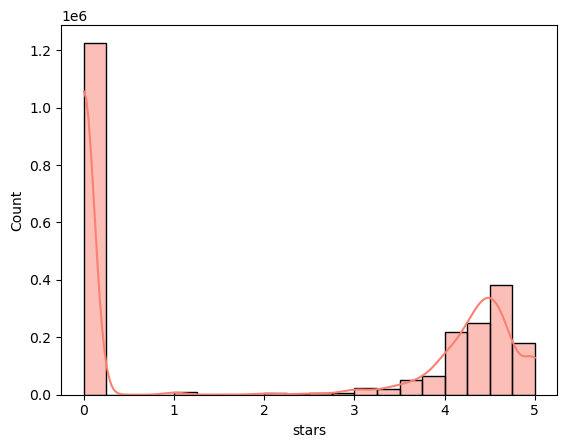

In [85]:
sns.histplot(df['stars'], kde=True, bins=20, color="salmon")